In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import json
import os
import datetime as dt

from pandas.plotting import lag_plot
import matplotlib.dates as mdates

import xlrd

In [2]:
probe_data_file = os.path.join("data", "Probe.csv")
probe_df = pd.read_csv(probe_data_file)
cc_data_file = os.path.join("data", "Cell Count.csv")
cc_df = pd.read_csv(cc_data_file)
features =['pH', 'Temperature (°C)', 'D.O. (mg/L)', 'Turbidity (NTU)', 'NO3-N (mg/L)', 'NH4-N (mg/L)', 'ORP (MV)', 'Conductivity (mS/cm)']

In [3]:
probe_df = probe_df.drop(columns='TSS (g/L)') #Shown to be inreliable

In [4]:
probe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  5946 non-null   float64
 1   pH                    5946 non-null   float64
 2   Temperature (°C)      5946 non-null   float64
 3   D.O. (mg/L)           5946 non-null   float64
 4   Turbidity (NTU)       5946 non-null   float64
 5   NO3-N (mg/L)          5946 non-null   float64
 6   NH4-N (mg/L)          5946 non-null   float64
 7   ORP (MV)              5946 non-null   float64
 8   Conductivity (mS/cm)  5946 non-null   float64
dtypes: float64(9)
memory usage: 418.2 KB


In [5]:
def py_date(x):
    date_tuple = xlrd.xldate_as_tuple(x,0)
    return dt.datetime(*date_tuple)

probe_df["Date"] = probe_df["Date"].transform(py_date)

In [6]:
to_remove = ["Unnamed: 5", "Days Since Start", "Unnamed: 7", "RW2 Overflow", "RW3 Overflow", "RW3/RW1"]
cc_df = cc_df.drop(columns=to_remove)


In [7]:
cc_df["Date"] = cc_df["Date"].transform(py_date)
cc_df.set_index("Date", inplace=True)

In [8]:
first_date = probe_df.Date.iloc[0]
last_date = probe_df.Date.iloc[-1]
cc_df = cc_df[(cc_df.index > first_date) & (cc_df.index < last_date)]

In [9]:
probe_df.set_index("Date", inplace=True)

probe_df = probe_df.between_time("09:23", "09:37")


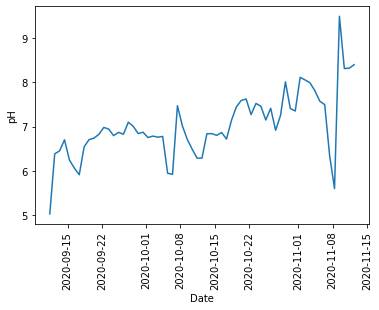

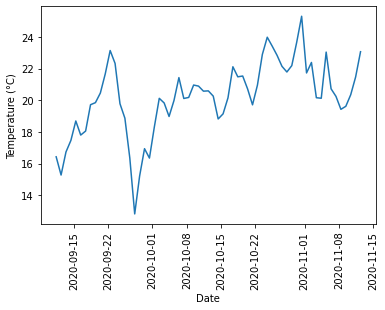

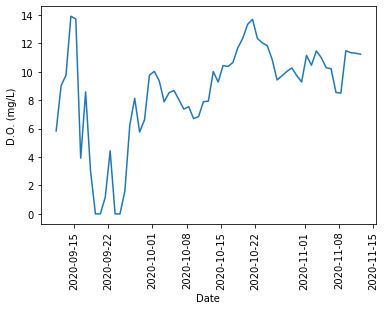

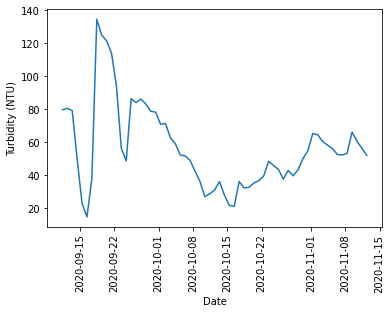

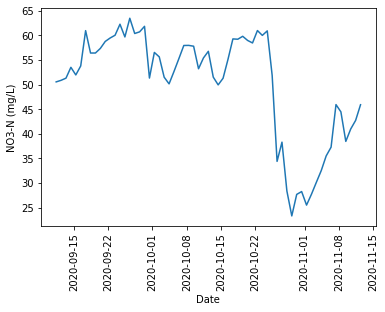

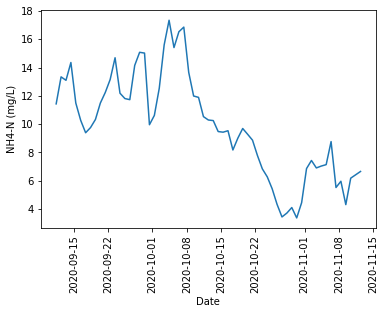

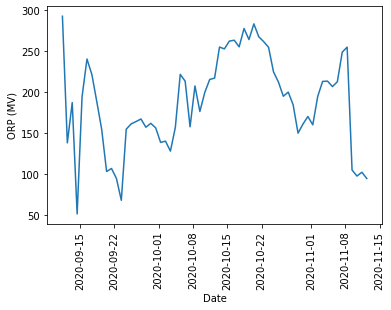

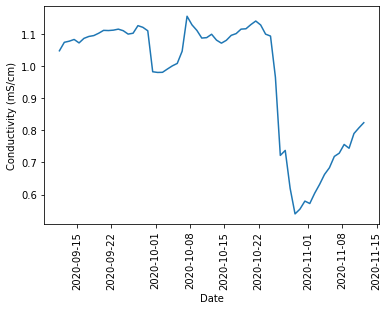

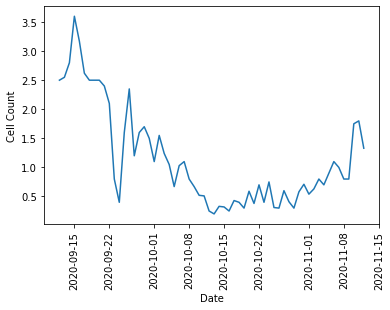

In [10]:
for feature in features:
    plt.figure()
    plt.plot(probe_df.index, probe_df[feature])
    plt.xticks(rotation=90)
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.savefig(feature.split(" ", 2)[0] + " v time.png")
    plt.show

#TODO:Correct timescale
plt.figure()
plt.plot(cc_df.index, cc_df["RW2"])
plt.xlabel("Date")
plt.ylabel("Cell Count")
plt.xticks(rotation=90)
plt.savefig("Cell Count v time.png")
plt.show()


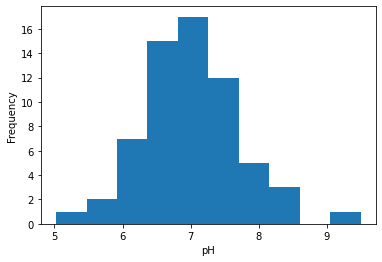

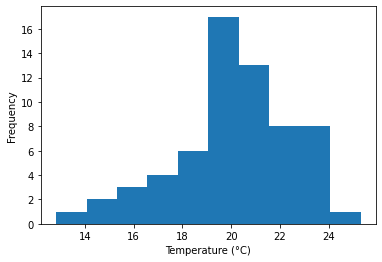

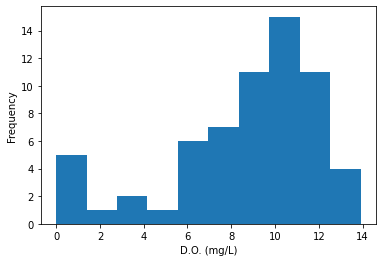

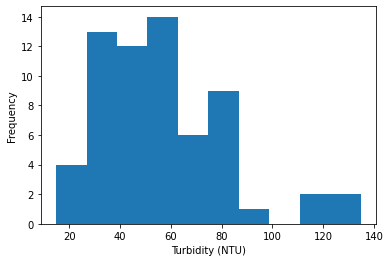

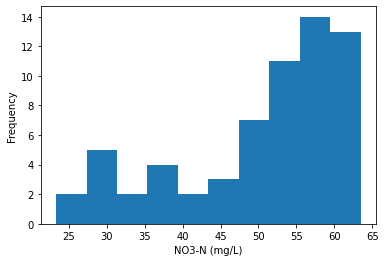

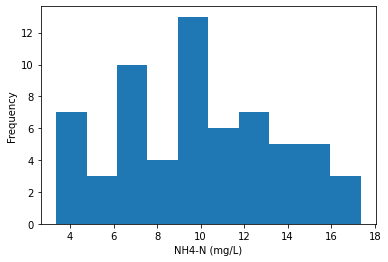

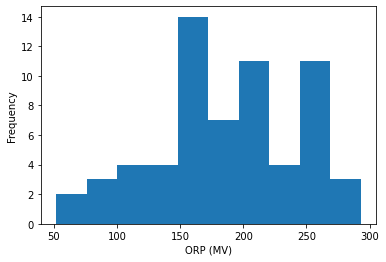

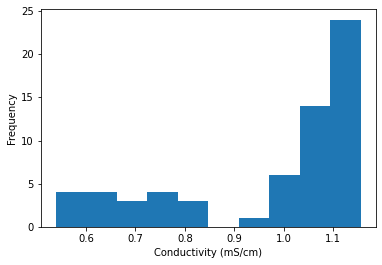

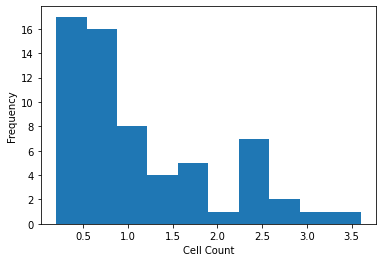

In [11]:
for feature in features:
    plt.figure()
    plt.hist(probe_df[feature])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig(feature.split(" ", 2)[0] + " freq.png")
    plt.show


plt.figure()
plt.hist(cc_df["RW2"])
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.savefig("Cell Count freq.png")
plt.show()

array([[<AxesSubplot:xlabel='pH', ylabel='pH'>,
        <AxesSubplot:xlabel='Temperature (°C)', ylabel='pH'>,
        <AxesSubplot:xlabel='D.O. (mg/L)', ylabel='pH'>,
        <AxesSubplot:xlabel='Turbidity (NTU)', ylabel='pH'>,
        <AxesSubplot:xlabel='NO3-N (mg/L)', ylabel='pH'>,
        <AxesSubplot:xlabel='NH4-N (mg/L)', ylabel='pH'>,
        <AxesSubplot:xlabel='ORP (MV)', ylabel='pH'>,
        <AxesSubplot:xlabel='Conductivity (mS/cm)', ylabel='pH'>],
       [<AxesSubplot:xlabel='pH', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='Temperature (°C)', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='D.O. (mg/L)', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='Turbidity (NTU)', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='NO3-N (mg/L)', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='NH4-N (mg/L)', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='ORP (MV)', ylabel='Temperature (°C)'>,
        <AxesSubplot:xlabel='Conductivi

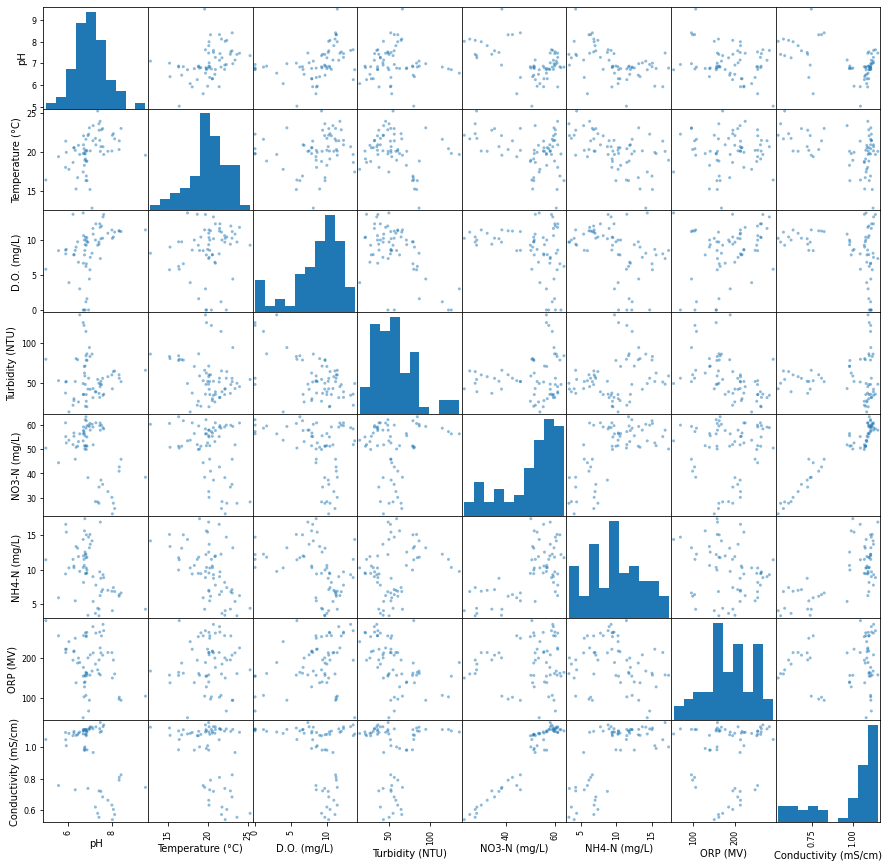

In [12]:
pd.plotting.scatter_matrix(probe_df[features], figsize=(15,15))

In [13]:
probe_df = probe_df.set_index(probe_df.index.date)
probe_df.index.name = "Date"

In [14]:
merge_df=pd.merge(probe_df,cc_df, how='inner', left_index=True, right_index=True)

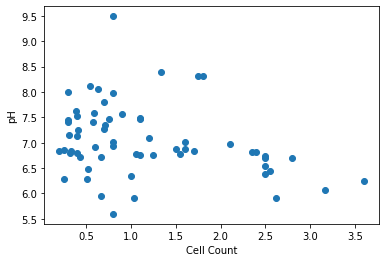

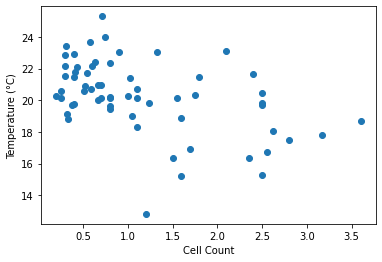

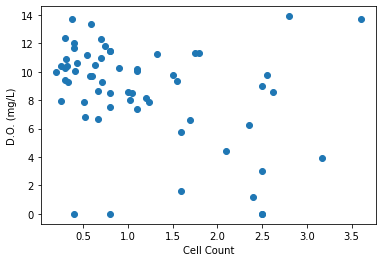

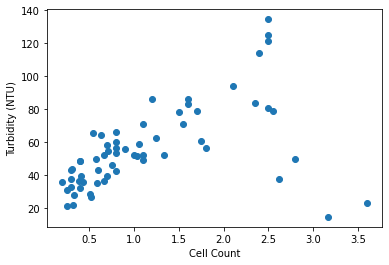

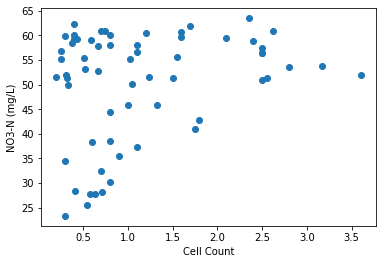

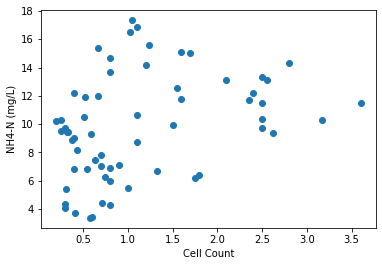

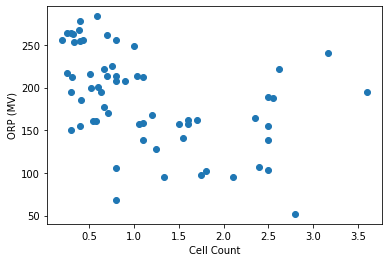

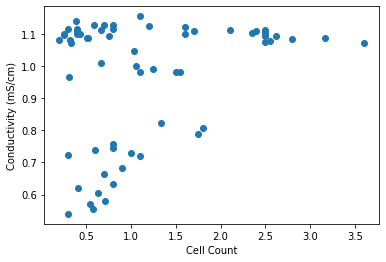

In [15]:
for feature in features:
    plt.figure()
    plt.scatter(merge_df["RW2"], merge_df[feature])
    plt.xlabel("Cell Count")
    plt.ylabel(feature)
    plt.savefig(feature.split(" ", 2)[0] + " v Cell Count.png")
    plt.show